In [340]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [341]:
df=pd.read_csv('train_data_1.csv')


In [342]:
df.shape

(270000, 45)

In [343]:
df.head().T

,0,1,2,3,4
member_id,58189336,70011223,70255675,1893936,7652106
loan_amnt,14350,4800,10000,15000,16000
funded_amnt,14350,4800,10000,15000,16000
funded_amnt_inv,14350.0,4800.0,10000.0,15000.0,16000.0
term,36 months,36 months,36 months,36 months,36 months
batch_enrolled,NaN,BAT1586599,BAT1586599,BAT4808022,BAT2833642
int_rate,19.19,10.99,7.26,19.72,10.64
grade,E,B,A,D,B
sub_grade,E3,B4,A4,D5,B2
emp_title,clerk,Human Resources Specialist,Driver,Us office of Personnel Management,LAUSD-HOLLYWOOD HIGH SCHOOL


In [344]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270000 entries, 0 to 269999
Data columns (total 45 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   member_id                    270000 non-null  int64  
 1   loan_amnt                    270000 non-null  int64  
 2   funded_amnt                  270000 non-null  int64  
 3   funded_amnt_inv              270000 non-null  float64
 4   term                         270000 non-null  object 
 5   batch_enrolled               173125 non-null  object 
 6   int_rate                     270000 non-null  float64
 7   grade                        270000 non-null  object 
 8   sub_grade                    270000 non-null  object 
 9   emp_title                    254375 non-null  object 
 10  emp_length                   256370 non-null  object 
 11  home_ownership               270000 non-null  object 
 12  annual_inc                   269998 non-null  float64
 13 

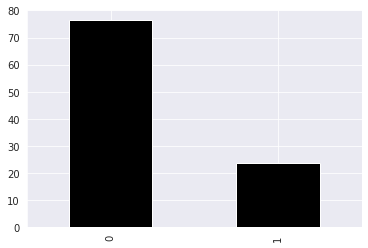

In [345]:
(df['loan_status'].value_counts(normalize=True)*100).plot(kind='bar',color='black');

In [346]:
df.drop('member_id',axis=1,inplace=True)

In [347]:
#term,last_week_pay,emp_len-->convert to float

In [348]:
df['term']=df['term'].str.extract(r'(\d)').astype(float)

In [349]:
df['last_week_pay']=df['last_week_pay'].str.extract(r'(\d)').astype(float)

In [350]:
df['emp_length']=df['emp_length'].str.strip('years').str.replace('+','').str.replace('<','').str.strip(' ').str.replace('10','11').astype(float)

In [351]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270000 entries, 0 to 269999
Data columns (total 44 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    270000 non-null  int64  
 1   funded_amnt                  270000 non-null  int64  
 2   funded_amnt_inv              270000 non-null  float64
 3   term                         270000 non-null  float64
 4   batch_enrolled               173125 non-null  object 
 5   int_rate                     270000 non-null  float64
 6   grade                        270000 non-null  object 
 7   sub_grade                    270000 non-null  object 
 8   emp_title                    254375 non-null  object 
 9   emp_length                   256370 non-null  float64
 10  home_ownership               270000 non-null  object 
 11  annual_inc                   269998 non-null  float64
 12  verification_status          270000 non-null  object 
 13 

#Handling Missing values

In [352]:
df.isnull().mean()*100

loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
term                            0.000000
batch_enrolled                 35.879630
int_rate                        0.000000
grade                           0.000000
sub_grade                       0.000000
emp_title                       5.787037
emp_length                      5.048148
home_ownership                  0.000000
annual_inc                      0.000741
verification_status             0.000000
pymnt_plan                      0.000000
desc                           85.785556
purpose                         0.000000
title                           0.015926
zip_code                        0.000000
addr_state                      0.000000
dti                             0.000000
delinq_2yrs                     0.002222
inq_last_6mths                  0.002222
mths_since_last_delinq         51.297037
mths_since_last_record         84.707778
open_acc        

*Dropping all the features which have more than 50 percent of its values missing*

In [353]:
num_null={}
cat_null={}
for i in df.columns:
  if df[i].isnull().mean()*100 >=50:
    df.drop(i,axis=1,inplace=True)
  elif df[i].isnull().mean()*100 >0 and df[i].isnull().mean()*100 <50:
    if df[i].dtype=='O':
      cat_null[i]=df[i].isnull().mean()*100
    else:
      num_null[i]=df[i].isnull().mean()*100
  


In [354]:
cat_null

{'batch_enrolled': 35.879629629629626,
 'emp_title': 5.787037037037037,
 'title': 0.015925925925925927}

In [355]:
num_null

{'acc_now_delinq': 0.0022222222222222222,
 'annual_inc': 0.0007407407407407407,
 'collections_12_mths_ex_med': 0.015555555555555557,
 'delinq_2yrs': 0.0022222222222222222,
 'emp_length': 5.048148148148148,
 'inq_last_6mths': 0.0022222222222222222,
 'last_week_pay': 2.01,
 'open_acc': 0.0022222222222222222,
 'pub_rec': 0.0022222222222222222,
 'revol_util': 0.054814814814814816,
 'tot_coll_amt': 7.919629629629629,
 'tot_cur_bal': 7.919629629629629,
 'total_acc': 0.0022222222222222222,
 'total_rev_hi_lim': 7.919629629629629}

In [356]:
df.isnull().mean()*100

loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
batch_enrolled                35.879630
int_rate                       0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      5.787037
emp_length                     5.048148
home_ownership                 0.000000
annual_inc                     0.000741
verification_status            0.000000
pymnt_plan                     0.000000
purpose                        0.000000
title                          0.015926
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000
delinq_2yrs                    0.002222
inq_last_6mths                 0.002222
open_acc                       0.002222
pub_rec                        0.002222
revol_bal                      0.000000
revol_util                     0.054815


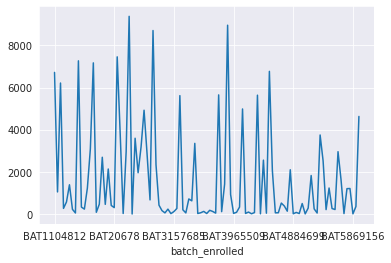

In [357]:
df.groupby('batch_enrolled')['loan_status'].count().plot(kind='line');

*As the batch enrolled is arbitrary and there is  no relation between batch enrolled and loan defualt as such, I am  dropping this feature*

In [358]:
df.drop('batch_enrolled',axis=1,inplace=True)

In [359]:
del cat_null['batch_enrolled']

In [360]:
cat_null

{'emp_title': 5.787037037037037, 'title': 0.015925925925925927}

In [361]:
df['emp_title'].value_counts(normalize=True)*100

Teacher                     1.607469
Manager                     1.387322
RN                          0.665553
Owner                       0.664373
Registered Nurse            0.650614
                              ...   
communication assistant     0.000393
Sr. Merchant Assistant      0.000393
guest services attendant    0.000393
Amcare Technician           0.000393
21 dealer                   0.000393
Name: emp_title, Length: 107741, dtype: float64

In [362]:
df['emp_title'].isnull().sum()

15625

*Random imputation of missing values in emp_title feature* 

In [363]:
df['emp_title'][df['emp_title'].isnull()]=df['emp_title'].dropna().sample(df['emp_title'].isnull().sum()).values

In [364]:
df['emp_title'].isnull().sum()

0

In [365]:
del cat_null['emp_title']

In [366]:
cat_null

{'title': 0.015925925925925927}

In [367]:
df['title'].dropna(inplace=True)

In [368]:
df.isnull().mean()*100

loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
grade                         0.000000
sub_grade                     0.000000
emp_title                     0.000000
emp_length                    5.048148
home_ownership                0.000000
annual_inc                    0.000741
verification_status           0.000000
pymnt_plan                    0.000000
purpose                       0.000000
title                         0.015926
zip_code                      0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.002222
inq_last_6mths                0.002222
open_acc                      0.002222
pub_rec                       0.002222
revol_bal                     0.000000
revol_util                    0.054815
total_acc                     0.002222
initial_list_status      

In [369]:
del cat_null

In [370]:
num_null

{'acc_now_delinq': 0.0022222222222222222,
 'annual_inc': 0.0007407407407407407,
 'collections_12_mths_ex_med': 0.015555555555555557,
 'delinq_2yrs': 0.0022222222222222222,
 'emp_length': 5.048148148148148,
 'inq_last_6mths': 0.0022222222222222222,
 'last_week_pay': 2.01,
 'open_acc': 0.0022222222222222222,
 'pub_rec': 0.0022222222222222222,
 'revol_util': 0.054814814814814816,
 'tot_coll_amt': 7.919629629629629,
 'tot_cur_bal': 7.919629629629629,
 'total_acc': 0.0022222222222222222,
 'total_rev_hi_lim': 7.919629629629629}

In [371]:
df['acc_now_delinq'].value_counts()

0.0    268766
1.0      1148
2.0        65
3.0         9
4.0         4
5.0         2
Name: acc_now_delinq, dtype: int64

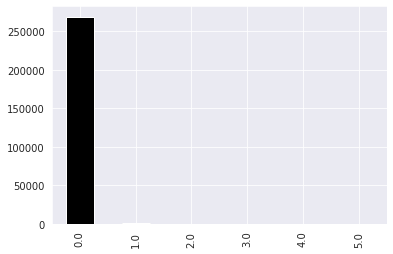

In [372]:
df['acc_now_delinq'].value_counts().plot(kind='bar',color='black');

In [373]:
df['acc_now_delinq'].dropna(inplace=True)

In [374]:
df[df['acc_now_delinq'].isnull()==True].T

,152427,158498,170053,198875,206905,212464
loan_amnt,4350,1000,6500,7000,7200,1275
funded_amnt,4350,1000,6500,7000,5075,1275
funded_amnt_inv,825.0,625.0,0.0,3450.0,350.0,0.0
term,3.0,3.0,3.0,3.0,3.0,3.0
int_rate,8.07,14.07,8.38,7.75,10.28,12.49
grade,A,E,A,A,C,D
sub_grade,A4,E3,A5,A3,C1,D3
emp_title,Manager,Macy's,Public Service Worker 2,Event mgr,Event Manager,Infinitely law group
emp_length,1.0,11.0,1.0,1.0,1.0,1.0
home_ownership,RENT,RENT,NONE,NONE,RENT,RENT


In [375]:
df['annual_inc'].dropna(inplace=True)

In [376]:
df[df['emp_length'].isnull()==True]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,application_type,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
17,30750,30750,30700.0,3.0,16.99,D,D1,"Associate Professor, English",NaN,MORTGAGE,70000.00,Verified,n,credit_card,Credit card refinancing,191xx,PA,29.13,3.0,2.0,7.0,0.0,17299,99.4,35.0,f,7394.32,0.0,0.0,0.0,0.0,INDIVIDUAL,1.0,0.0,0.0,221335.0,17400.0,0
35,10000,10000,10000.0,6.0,19.52,E,E3,RENOWN HEALTH,NaN,MORTGAGE,29500.00,Verified,n,debt_consolidation,Debt consolidation,335xx,FL,6.59,0.0,1.0,6.0,0.0,4890,54.9,18.0,w,1147.08,0.0,0.0,0.0,0.0,INDIVIDUAL,3.0,0.0,0.0,4890.0,8900.0,0
36,5000,5000,5000.0,3.0,13.98,C,C3,MD LAB,NaN,RENT,19000.00,Verified,n,other,Other,112xx,NY,13.90,0.0,0.0,7.0,0.0,5422,82.2,12.0,f,728.43,0.0,0.0,0.0,0.0,INDIVIDUAL,6.0,0.0,50.0,5422.0,6600.0,0
84,20000,20000,20000.0,3.0,11.67,B,B4,Technical support engineer,NaN,RENT,103320.00,Source Verified,n,home_improvement,Home improvement,104xx,NY,15.17,1.0,1.0,17.0,0.0,19612,44.7,48.0,w,2658.26,0.0,0.0,0.0,0.0,INDIVIDUAL,7.0,0.0,0.0,27435.0,43900.0,0
99,25000,25000,25000.0,6.0,13.35,C,C2,owner,NaN,MORTGAGE,56000.00,Verified,n,credit_card,Credit card refinancing,191xx,PA,28.44,0.0,0.0,11.0,0.0,20318,65.1,27.0,w,4685.77,0.0,0.0,0.0,0.0,INDIVIDUAL,8.0,0.0,0.0,186934.0,31200.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269901,12000,12000,12000.0,3.0,13.53,B,B5,Bus driver,NaN,RENT,59071.18,Source Verified,n,debt_consolidation,Debt consolidation,331xx,FL,21.58,0.0,1.0,13.0,0.0,12539,55.0,22.0,w,1413.31,0.0,0.0,0.0,0.0,INDIVIDUAL,5.0,0.0,529.0,53006.0,22800.0,0
269930,35000,35000,35000.0,6.0,16.99,D,D3,Office Manager,NaN,OWN,80000.00,Verified,n,credit_card,Credit card refinancing,485xx,MI,26.72,1.0,1.0,5.0,0.0,13472,93.6,12.0,f,4196.68,0.0,0.0,0.0,0.0,INDIVIDUAL,4.0,0.0,0.0,49771.0,14400.0,0
269938,8000,8000,8000.0,3.0,13.99,C,C4,DAVITA,NaN,OWN,70000.00,Not Verified,n,debt_consolidation,Debt consolidation,197xx,DE,22.92,1.0,1.0,7.0,0.0,26197,86.2,29.0,f,828.95,0.0,0.0,0.0,0.0,INDIVIDUAL,4.0,0.0,0.0,433840.0,30400.0,0
269953,19500,19500,19500.0,6.0,15.61,D,D1,Billing Coordinator,NaN,OWN,43344.00,Verified,n,debt_consolidation,Debt consolidation,700xx,LA,23.75,0.0,0.0,18.0,0.0,27829,52.6,43.0,w,2849.76,0.0,0.0,0.0,0.0,INDIVIDUAL,5.0,0.0,0.0,27829.0,52900.0,0


In [377]:
df['emp_length'][df['emp_length'].isnull()]=df['emp_length'].dropna().sample(df['emp_length'].isnull().sum()).values

In [378]:
df['emp_length'].isnull().sum()

0

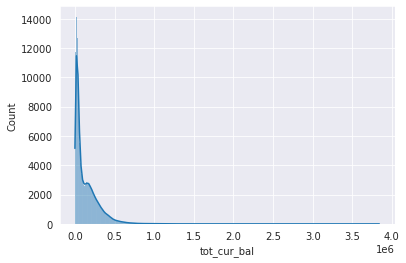

In [379]:
sns.histplot(df['tot_cur_bal'],kde=True);

In [380]:
df['tot_coll_amt'][df['tot_coll_amt'].isnull()]=df['tot_coll_amt'].dropna().sample(df['tot_coll_amt'].isnull().sum()).values

In [381]:
df['tot_cur_bal'][df['tot_cur_bal'].isnull()]=df['tot_cur_bal'].dropna().sample(df['tot_cur_bal'].isnull().sum()).values

In [382]:
df['total_rev_hi_lim'][df['total_rev_hi_lim'].isnull()]=df['total_rev_hi_lim'].dropna().sample(df['total_rev_hi_lim'].isnull().sum()).values

In [383]:
del num_null['tot_coll_amt']
del num_null['tot_cur_bal']
del num_null['total_rev_hi_lim']

In [384]:
del num_null['acc_now_delinq']
del num_null['emp_length']
del num_null['annual_inc']

In [385]:
num_null

{'collections_12_mths_ex_med': 0.015555555555555557,
 'delinq_2yrs': 0.0022222222222222222,
 'inq_last_6mths': 0.0022222222222222222,
 'last_week_pay': 2.01,
 'open_acc': 0.0022222222222222222,
 'pub_rec': 0.0022222222222222222,
 'revol_util': 0.054814814814814816,
 'total_acc': 0.0022222222222222222}

In [386]:
df.dropna(inplace=True)

In [387]:
df.isnull().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
grade                         0
sub_grade                     0
emp_title                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
pymnt_plan                    0
purpose                       0
title                         0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collection_recovery_fee       0
collections_12_mths_ex_med    0
applicat

#EDA

In [388]:
df['loan_amnt'].dtype

dtype('int64')

In [389]:
cat_col=[  col for col in df.columns if df[col].dtype=='O']

In [390]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264389 entries, 0 to 269999
Data columns (total 38 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   264389 non-null  int64  
 1   funded_amnt                 264389 non-null  int64  
 2   funded_amnt_inv             264389 non-null  float64
 3   term                        264389 non-null  float64
 4   int_rate                    264389 non-null  float64
 5   grade                       264389 non-null  object 
 6   sub_grade                   264389 non-null  object 
 7   emp_title                   264389 non-null  object 
 8   emp_length                  264389 non-null  float64
 9   home_ownership              264389 non-null  object 
 10  annual_inc                  264389 non-null  float64
 11  verification_status         264389 non-null  object 
 12  pymnt_plan                  264389 non-null  object 
 13  purpose       

In [391]:
cat_col

['grade',
 'sub_grade',
 'emp_title',
 'home_ownership',
 'verification_status',
 'pymnt_plan',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'initial_list_status',
 'application_type']

In [392]:
num_col=[col for col in df.columns if col not in cat_col]

In [393]:
cat_col

['grade',
 'sub_grade',
 'emp_title',
 'home_ownership',
 'verification_status',
 'pymnt_plan',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'initial_list_status',
 'application_type']

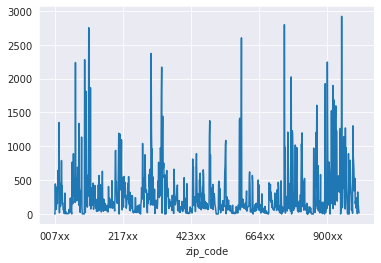

In [394]:
df.groupby('zip_code')['loan_status'].count().plot(kind='line');

In [395]:
df.drop('zip_code',axis=1,inplace=True)

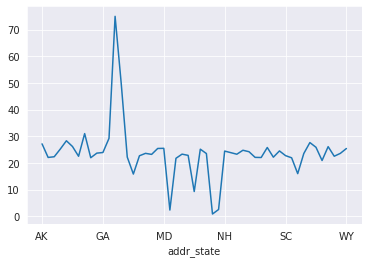

In [396]:
(df.groupby('addr_state')['loan_status'].mean()*100).plot(kind='line');

In [397]:
(df.groupby('addr_state')['loan_status'].mean()*100).sort_values()

addr_state
ND     0.800000
ME     2.290076
NE     2.492212
MS     9.242144
IN    15.797172
TN    15.953307
VT    20.887246
MI    21.714452
SD    21.899225
DE    21.925134
OK    22.009366
AL    22.032374
OH    22.062323
PA    22.129392
IL    22.164997
AR    22.295918
CT    22.476718
WI    22.489602
KS    22.658863
SC    22.712834
MO    22.810304
LA    23.178594
NM    23.243243
MN    23.271889
NC    23.493810
TX    23.508705
WV    23.560606
KY    23.571147
FL    23.648352
NJ    23.838185
GA    23.887344
NY    24.184191
NH    24.420402
RI    24.477861
NV    24.732620
MT    25.135135
AZ    25.184094
WY    25.385935
MA    25.403029
MD    25.456857
OR    25.766871
VA    25.853102
WA    26.086957
CO    26.142497
AK    27.136432
UT    27.613941
CA    28.289966
HI    29.199372
DC    30.982019
ID    50.000000
IA    75.000000
Name: loan_status, dtype: float64

In [398]:
df['addr_state'].value_counts()

CA    38777
NY    22064
TX    21022
FL    18200
IL    10679
NJ    10135
PA     9336
OH     8825
GA     8628
VA     7883
NC     7270
MI     6871
MD     6293
MA     6141
AZ     6111
WA     5819
CO     5558
MN     4774
MO     4270
IN     4102
CT     3973
TN     3855
NV     3740
WI     3366
AL     3336
OR     3260
SC     3148
LA     3102
KY     2537
KS     2392
OK     2349
AR     1960
UT     1865
NM     1480
WV     1320
NH     1294
HI     1274
RI     1197
MS     1082
DE      748
MT      740
DC      723
AK      667
WY      583
VT      541
SD      516
NE      321
ME      131
ND      125
IA        4
ID        2
Name: addr_state, dtype: int64



1.  *Though there is abnormally high rate of default from couple of states(Idaho and Iowa),we can't draw a conclusion that these states will have high rates of default, reason being for extremely low data from these two states *
2.  *Similar is the case for the states with low rate of default(Maine,Nebraska,North Dakota)*

     Consequently we can establish that each state has more or less similar rate of default and can't help predict the default.
     Hence we can drop this state feature








In [399]:
df.drop('addr_state',axis=1,inplace=True)

In [400]:
df['home_ownership'].value_counts()

MORTGAGE    131660
RENT        106705
OWN          25951
OTHER           55
NONE            17
ANY              1
Name: home_ownership, dtype: int64

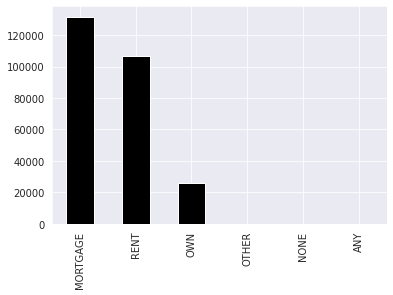

In [401]:
df['home_ownership'].value_counts().plot(kind='bar',color='black');

In [402]:
(df.groupby('home_ownership')['loan_status'].mean()*100)

home_ownership
ANY          0.000000
MORTGAGE    24.413641
NONE        70.588235
OTHER       78.181818
OWN         21.282417
RENT        24.384987
Name: loan_status, dtype: float64

*We can observe that whether the home is mortgaged ,rented or own the default rates are nearly similar. And for the other categories of home ownership we cant generalize with relativley few data*

In [403]:
df['grade'].value_counts(normalize=True)*100

B    28.629784
C    27.739808
A    16.752210
D    15.729853
E     7.921661
F     2.620760
G     0.605925
Name: grade, dtype: float64

In [404]:
(df.groupby('grade')['loan_status'].mean()*100)

grade
A    27.603802
B    26.925516
C    21.994519
D    22.128980
E    18.883690
F    21.301775
G    23.033708
Name: loan_status, dtype: float64

In [405]:
df.groupby('sub_grade')['loan_status'].mean()*100

sub_grade
A1    25.018660
A2    27.010400
A3    30.142653
A4    30.586063
A5    25.590376
B1    24.848439
B2    27.347330
B3    28.560381
B4    27.294318
B5    26.099869
C1    24.044616
C2    23.092190
C3    20.902455
C4    19.808904
C5    21.876257
D1    21.555201
D2    23.198847
D3    22.868516
D4    21.795374
D5    21.086015
E1    18.282700
E2    18.276608
E3    19.434373
E4    19.285923
E5    19.857651
F1    19.529086
F2    20.959596
F3    23.647146
F4    23.200758
F5    20.284238
G1    21.415929
G2    22.926829
G3    21.505376
G4    29.670330
G5    24.096386
Name: loan_status, dtype: float64

*Its clear that each subgrade in one grade has more or less similar rate of default excpet for G4 .This could be random because of low data for that grade*


> So instead of using both subgrade feature and grade feature we can drop subgrade and go with Grade feature itself



In [406]:
df.drop('sub_grade',axis=1,inplace=True)

In [407]:
df['grade'].value_counts()

B    75694
C    73341
A    44291
D    41588
E    20944
F     6929
G     1602
Name: grade, dtype: int64

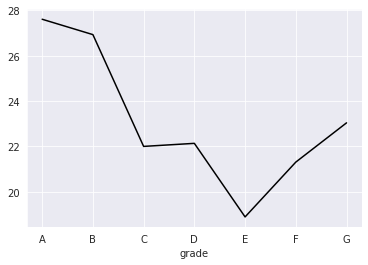

In [408]:
(df.groupby('grade')['loan_status'].mean()*100).plot(kind='line',color='black');

In [409]:
df['verification_status'].unique()

array(['Source Verified', 'Not Verified', 'Verified'], dtype=object)

In [410]:
df['verification_status'].value_counts()

Source Verified    98254
Verified           86637
Not Verified       79498
Name: verification_status, dtype: int64

In [411]:
def group(x):
  if 'Source Verified' in x:
    return 'Verified'
  else:
    return x

In [412]:
df['verification_status']=df['verification_status'].apply(lambda x:group(x))

In [413]:
df['verification_status'].value_counts()

Verified        184891
Not Verified     79498
Name: verification_status, dtype: int64

In [414]:
df['pymnt_plan'].value_counts()

n    264384
y         5
Name: pymnt_plan, dtype: int64

In [415]:
df['purpose'].value_counts()

debt_consolidation    156820
credit_card            61221
home_improvement       15328
other                  12608
major_purchase          5081
small_business          3051
car                     2595
medical                 2575
moving                  1651
vacation                1372
house                   1058
wedding                  742
renewable_energy         168
educational              119
Name: purpose, dtype: int64

In [416]:
(df.groupby('purpose')['loan_status'].mean()*100).sort_values()

purpose
credit_card           21.036899
debt_consolidation    23.642393
home_improvement      25.691545
vacation              27.332362
other                 27.680838
medical               28.776699
moving                30.284676
major_purchase        31.607951
small_business        34.775483
car                   36.724470
house                 38.374291
renewable_energy      38.690476
wedding               74.932615
educational           79.831933
Name: loan_status, dtype: float64

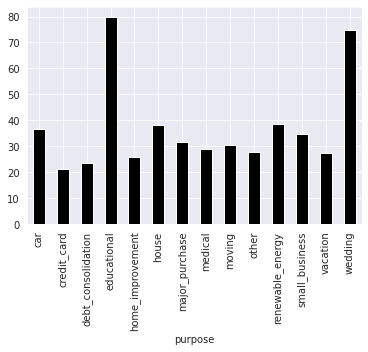

In [417]:
(df.groupby('purpose')['loan_status'].mean()*100).plot(kind='bar',color='black');
plt.xticks(rotation='vertical');

*Though the default rates for the purpose of education and wedding are high we can't generalize on that for relatively less data*

In [418]:
df['title'].value_counts(normalize=True)*100

Debt consolidation             46.638098
Credit card refinancing        18.340778
Home improvement                4.456691
Other                           3.513384
Debt Consolidation              1.880562
                                 ...    
Debt free with one payment.     0.000378
Lower my monthly payment!       0.000378
Paid off early                  0.000378
Start Anew                      0.000378
Cut Credit Card                 0.000378
Name: title, Length: 22127, dtype: float64

As the title is nothing but the loan title provided by applicant and its being captured by purpose feature we can drop the title column

In [419]:
df.drop('title',axis=1,inplace=True)

In [420]:
df['initial_list_status'].value_counts()

f    138050
w    126339
Name: initial_list_status, dtype: int64

In [421]:
df.groupby('initial_list_status')['loan_status'].mean()*100

initial_list_status
f    33.193770
w    14.181686
Name: loan_status, dtype: float64

In [422]:
df['application_type'].value_counts()

INDIVIDUAL    264277
JOINT            112
Name: application_type, dtype: int64

In [423]:
df.groupby('application_type')['loan_status'].mean()*100

application_type
INDIVIDUAL    24.119011
JOINT          0.000000
Name: loan_status, dtype: float64

In [424]:
df['emp_title'].value_counts()

Teacher                              4171
Manager                              3640
RN                                   1757
Owner                                1727
Registered Nurse                     1707
                                     ... 
Check Services Clerk III                1
Sheridan VA Hospital                    1
St Joseph Regional Medical Center       1
Final Assembly Speicalist               1
21 dealer                               1
Name: emp_title, Length: 106377, dtype: int64

In [425]:
df.drop('emp_title',axis=1,inplace=True)

In [426]:
num_col

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'emp_length',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'collections_12_mths_ex_med',
 'last_week_pay',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim',
 'loan_status']

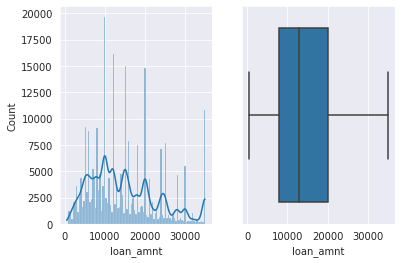

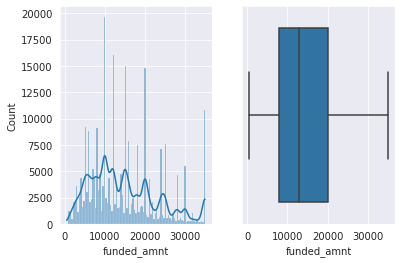

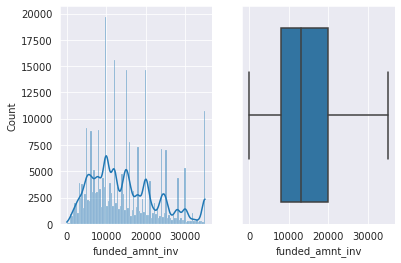

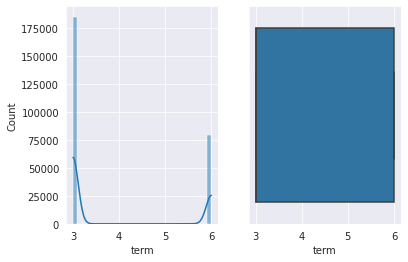

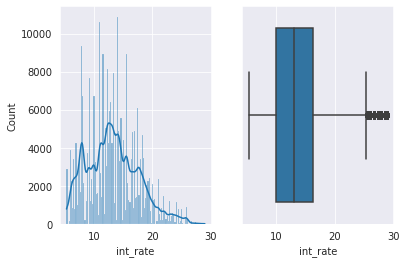

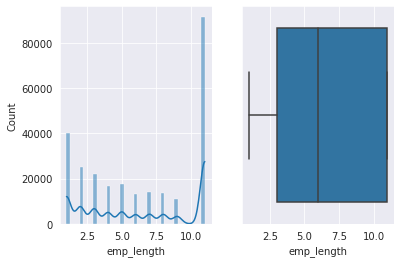

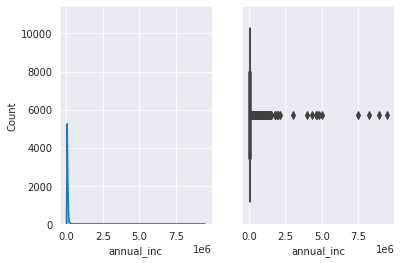

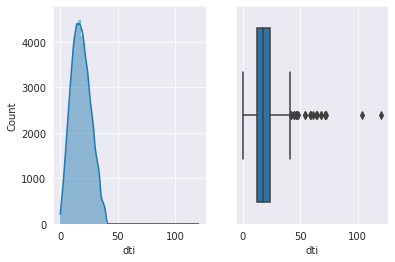

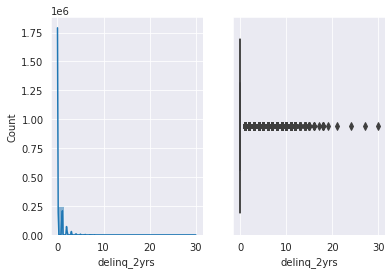

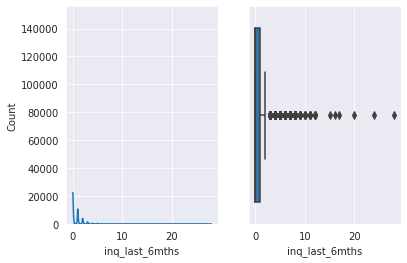

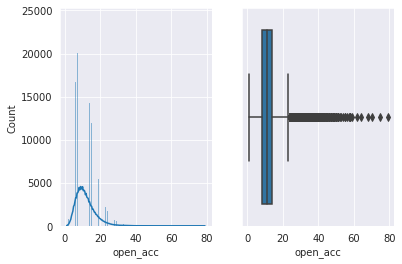

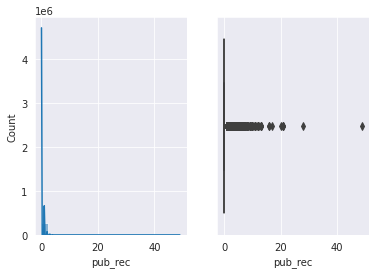

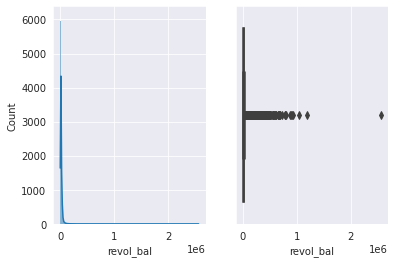

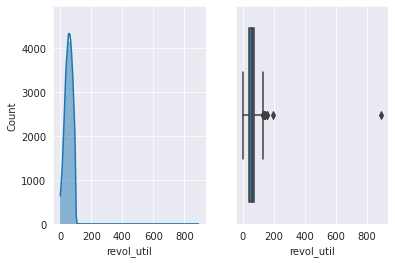

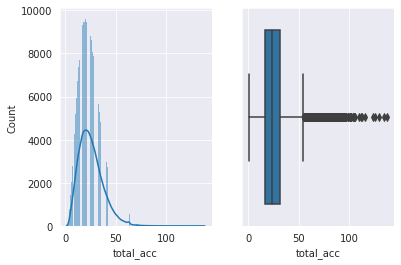

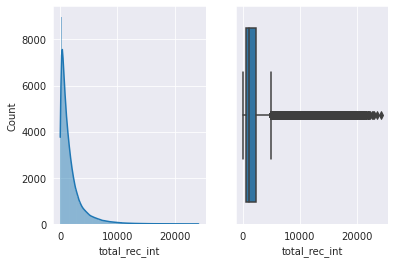

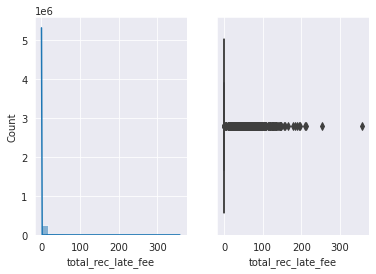

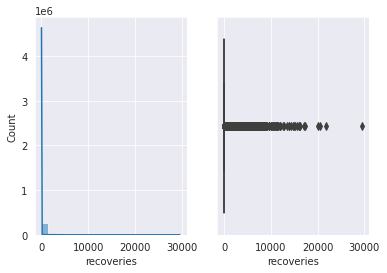

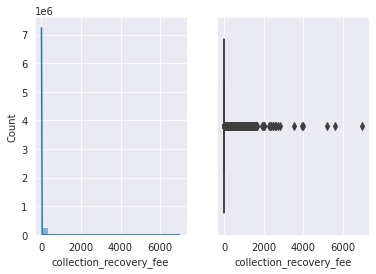

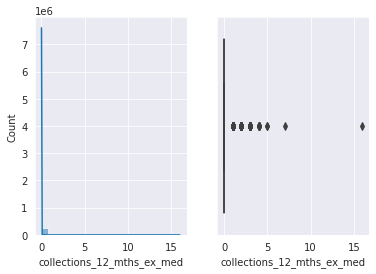

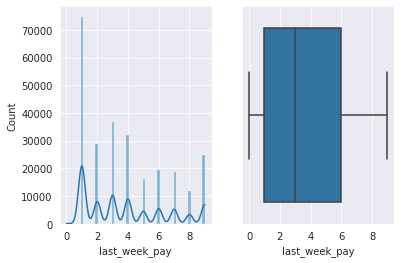

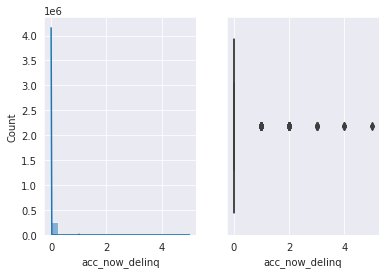

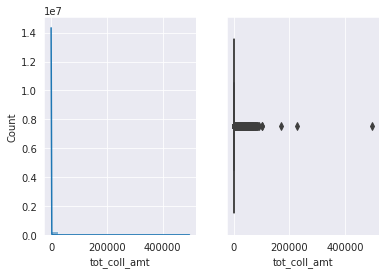

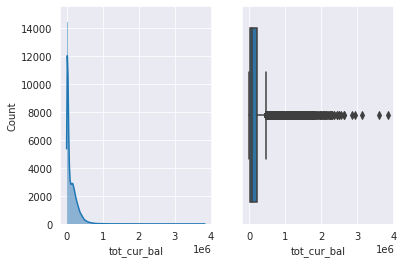

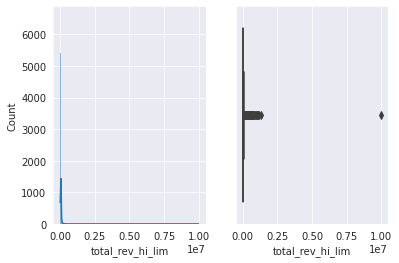

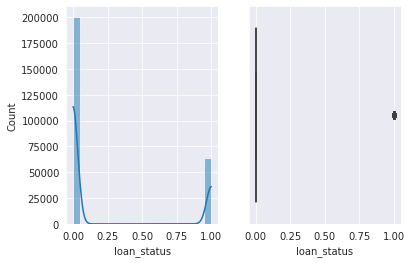

In [427]:
for col in num_col:
  plt.subplot(1,2,1)
  sns.histplot(df[col],kde=True)
  plt.subplot(1,2,2)
  sns.boxplot(df[col])
  plt.show()


In [428]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,264389.0,14746.132120,8419.960446,500.00,8000.00,13000.00,20000.00,35000.00
funded_amnt,264389.0,14732.241602,8414.143263,500.00,8000.00,13000.00,20000.00,35000.00
funded_amnt_inv,264389.0,14692.657555,8426.280774,0.00,8000.00,13000.00,20000.00,35000.00
term,264389.0,3.900605,1.375039,3.00,3.00,3.00,6.00,6.00
int_rate,264389.0,13.256929,4.379524,5.32,9.99,12.99,16.20,28.99
emp_length,264389.0,6.436766,3.930408,1.00,3.00,6.00,11.00,11.00
annual_inc,264389.0,75006.113099,64678.770998,1896.00,45000.00,64568.00,90000.00,9500000.00
dti,264389.0,18.104242,8.293152,0.00,11.90,17.60,23.91,120.66
delinq_2yrs,264389.0,0.315164,0.867600,0.00,0.00,0.00,0.00,30.00
inq_last_6mths,264389.0,0.694651,0.995397,0.00,0.00,0.00,1.00,28.00


In [429]:
df['int_rate'].quantile([0.90,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])

0.90    18.99
0.91    19.20
0.92    19.52
0.93    19.99
0.94    20.49
0.95    20.99
0.96    21.98
0.97    22.47
0.98    23.63
0.99    24.99
1.00    28.99
Name: int_rate, dtype: float64

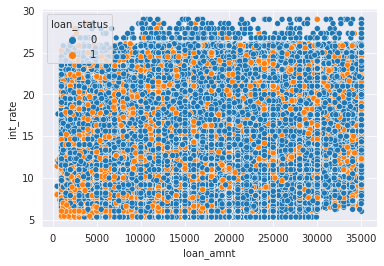

In [430]:
sns.scatterplot(y='int_rate',x='loan_amnt',data=df,hue='loan_status');

In [431]:
df['annual_inc'].quantile([0.90,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])

0.90     125000.0
0.91     128000.0
0.92     132000.0
0.93     140000.0
0.94     146000.0
0.95     150000.0
0.96     163000.0
0.97     180000.0
0.98     200000.0
0.99     250000.0
1.00    9500000.0
Name: annual_inc, dtype: float64

In [432]:
df=df[df['annual_inc']<250000]

In [433]:
df['dti'].quantile([0.95,0.96,0.97,0.98,0.99,0.991,0.992,0.993,0.994,0.995,0.996,0.997,0.998,0.999,1])

0.950     32.71
0.960     33.48
0.970     34.33
0.980     35.55
0.990     37.44
0.991     37.65
0.992     37.87
0.993     38.10
0.994     38.34
0.995     38.57
0.996     38.82
0.997     39.10
0.998     39.43
0.999     39.74
1.000    120.66
Name: dti, dtype: float64

In [434]:
df[df['dti']>39.73].shape

(264, 33)

In [435]:
df=df[df['dti']<39.73]

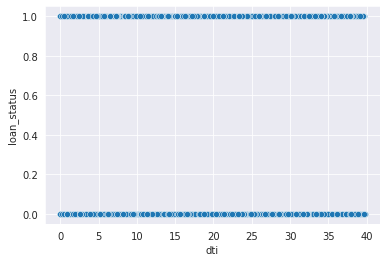

In [436]:
sns.scatterplot(x='dti',y='loan_status',data=df);

In [437]:
df['delinq_2yrs'].quantile([0.95,0.96,0.97,0.98,0.99,0.995,0.999,1])

0.950     2.0
0.960     2.0
0.970     2.0
0.980     3.0
0.990     4.0
0.995     5.0
0.999     9.0
1.000    30.0
Name: delinq_2yrs, dtype: float64

In [438]:
df[df['delinq_2yrs']>8].shape

(276, 33)

In [439]:
df=df[df['delinq_2yrs']<=8]

In [440]:
df['delinq_2yrs'].value_counts()

0.0    211350
1.0     32994
2.0      9896
3.0      3536
4.0      1530
5.0       773
6.0       448
7.0       225
8.0       132
Name: delinq_2yrs, dtype: int64

In [441]:
df.groupby('delinq_2yrs')['loan_status'].mean()*100

delinq_2yrs
0.0    25.185711
1.0    20.755289
2.0    19.169361
3.0    17.392534
4.0    15.620915
5.0    14.877102
6.0    14.285714
7.0    12.888889
8.0    22.727273
Name: loan_status, dtype: float64

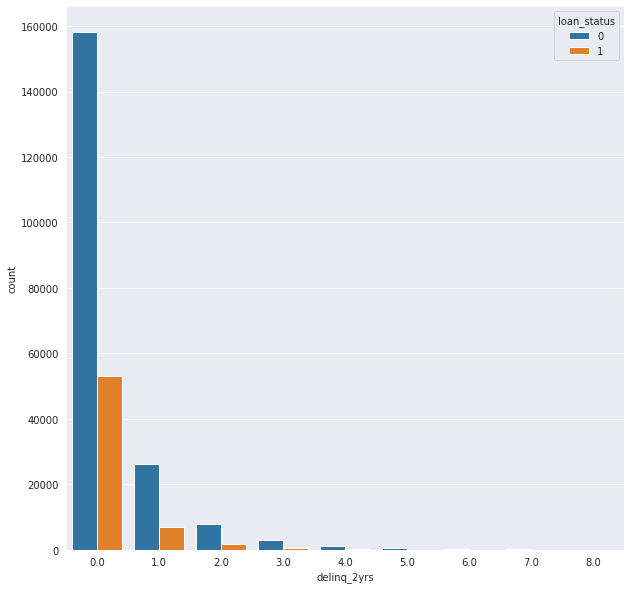

In [442]:
plt.figure(figsize=(10,10))
sns.countplot(x=df['delinq_2yrs'],hue='loan_status',data=df);

In [443]:
df['open_acc'].value_counts()

9.0     23794
10.0    23051
8.0     22662
11.0    21329
7.0     19921
        ...  
75.0        1
68.0        1
56.0        1
64.0        1
62.0        1
Name: open_acc, Length: 65, dtype: int64

In [444]:
df['open_acc'].quantile([0.95,0.96,0.97,0.98,0.99,0.995,0.999,1])

0.950    21.0
0.960    22.0
0.970    24.0
0.980    25.0
0.990    28.0
0.995    31.0
0.999    39.0
1.000    79.0
Name: open_acc, dtype: float64

In [445]:
df[df['open_acc']>38].shape

(273, 33)

In [446]:
df=df[df['open_acc']<38]

In [447]:
df['pub_rec'].quantile([0.95,0.96,0.97,0.98,0.99,0.999,1])

0.950     1.0
0.960     1.0
0.970     1.0
0.980     2.0
0.990     2.0
0.999     5.0
1.000    49.0
Name: pub_rec, dtype: float64

In [448]:
df['pub_rec'].value_counts()

0.0     221236
1.0      32870
2.0       4279
3.0       1305
4.0        432
5.0        200
6.0        101
7.0         52
8.0         26
10.0        11
9.0         10
12.0         8
11.0         8
13.0         4
21.0         2
16.0         2
28.0         1
17.0         1
49.0         1
Name: pub_rec, dtype: int64

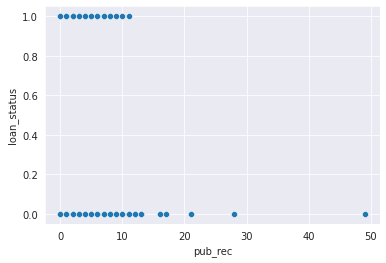

In [449]:
sns.scatterplot(x='pub_rec',y='loan_status',data=df);

In [450]:
df.groupby('pub_rec')['loan_status'].mean()*100

pub_rec
0.0     24.983276
1.0     20.894433
2.0     14.746436
3.0     13.409962
4.0     10.879630
5.0     10.500000
6.0      4.950495
7.0      3.846154
8.0     11.538462
9.0     10.000000
10.0     9.090909
11.0    12.500000
12.0     0.000000
13.0     0.000000
16.0     0.000000
17.0     0.000000
21.0     0.000000
28.0     0.000000
49.0     0.000000
Name: loan_status, dtype: float64

In [451]:
df=df[df['pub_rec']<11]

In [452]:
df['revol_bal'].quantile([0.95,0.96,0.97,0.98,0.99,1])

0.95     42754.00
0.96     46268.16
0.97     50957.11
0.98     60892.58
0.99     83879.96
1.00    777448.00
Name: revol_bal, dtype: float64

In [453]:
df=df[df['revol_bal']<df['revol_bal'].quantile(0.99)]

In [454]:
df['revol_util'].quantile([0.95,0.96,0.97,0.98,0.99,1])

0.95     92.4
0.96     93.8
0.97     95.2
0.98     96.7
0.99     98.5
1.00    892.3
Name: revol_util, dtype: float64

In [455]:
df=df[df['revol_util']<df['revol_util'].quantile(0.99)]

In [456]:
df['total_acc'].quantile([0.95,0.96,0.97,0.98,0.99,1])

0.95     47.0
0.96     49.0
0.97     51.0
0.98     54.0
0.99     59.9
1.00    124.0
Name: total_acc, dtype: float64

In [457]:
df=df[df['total_acc']<df['total_acc'].quantile(0.99)]

In [458]:
df['total_rec_int'].quantile([0.95,0.96,0.97,0.98,0.99,0.993,0.996,0.999,1])

0.950     5875.11000
0.960     6459.04360
0.970     7208.23200
0.980     8322.75640
0.990    10199.79320
0.993    11206.88716
0.996    12870.82016
0.999    16635.49100
1.000    24205.62000
Name: total_rec_int, dtype: float64

In [459]:
df=df[df['total_rec_int']<df['total_rec_int'].quantile(0.999)]

In [460]:
df['total_rec_late_fee'].quantile([0.95,0.96,0.97,0.98,0.99,0.993,0.996,0.999,1])

0.950      0.000000
0.960      0.000000
0.970      0.000000
0.980      0.000000
0.990     15.000000
0.993     21.094370
0.996     30.099988
0.999     55.530000
1.000    358.680000
Name: total_rec_late_fee, dtype: float64

In [461]:
df['total_rec_late_fee'].value_counts(normalize=True)*100

0.000000     98.580221
15.000000     0.329896
30.000000     0.044356
45.000000     0.007525
26.220000     0.002376
               ...    
15.230000     0.000396
15.610000     0.000396
15.000000     0.000396
14.936365     0.000396
14.944005     0.000396
Name: total_rec_late_fee, Length: 2192, dtype: float64

In [462]:
df.groupby('total_rec_late_fee')['loan_status'].mean()

total_rec_late_fee
0.000000      0.243605
0.010000      0.000000
0.180083      1.000000
0.184774      1.000000
0.350000      0.000000
                ...   
196.150000    0.000000
208.819530    1.000000
213.300000    0.000000
252.800000    0.000000
358.680000    0.000000
Name: loan_status, Length: 2192, dtype: float64

In [463]:
df['recoveries'].value_counts(normalize=True)*100

0.00       97.169154
11.20       0.001584
12.80       0.001584
11.52       0.001584
3000.00     0.001584
             ...    
1137.40     0.000396
2505.35     0.000396
1150.16     0.000396
789.32      0.000396
3735.05     0.000396
Name: recoveries, Length: 6946, dtype: float64

In [464]:
df.groupby('recoveries')['loan_status'].mean()

recoveries
0.00        0.250514
6.31        0.000000
6.87        0.000000
7.11        0.000000
8.41        0.000000
              ...   
16188.88    0.000000
17076.02    0.000000
17295.60    0.000000
21810.31    0.000000
29623.35    0.000000
Name: loan_status, Length: 6946, dtype: float64

In [465]:
df.drop('recoveries',axis=1,inplace=True)

In [466]:
df['collection_recovery_fee'].value_counts(normalize=True)*100

0.0000      97.306577
2.0000       0.003168
1.5600       0.002376
3.0500       0.001980
1.0200       0.001980
              ...    
15.6803      0.000396
86.3874      0.000396
9.8066       0.000396
180.0750     0.000396
672.3090     0.000396
Name: collection_recovery_fee, Length: 6358, dtype: float64

In [467]:
df.drop('collection_recovery_fee',axis=1,inplace=True)

In [468]:
df['collections_12_mths_ex_med'].value_counts(normalize=True)*100

0.0    98.702991
1.0     1.204733
2.0     0.076038
3.0     0.011881
4.0     0.003564
7.0     0.000396
5.0     0.000396
Name: collections_12_mths_ex_med, dtype: float64

In [469]:
df.drop('collections_12_mths_ex_med',axis=1,inplace=True)

In [470]:
df['acc_now_delinq'].value_counts(normalize=True)*100

0.0    99.560403
1.0     0.411875
2.0     0.023366
3.0     0.002772
4.0     0.001188
5.0     0.000396
Name: acc_now_delinq, dtype: float64

In [471]:
df.drop('acc_now_delinq',axis=1,inplace=True)

In [472]:
df['tot_coll_amt'].value_counts(normalize=True)*100

0.0        85.652108
50.0        0.214650
100.0       0.158809
75.0        0.137820
200.0       0.091880
             ...    
17418.0     0.000396
3564.0      0.000396
2378.0      0.000396
13855.0     0.000396
3700.0      0.000396
Name: tot_coll_amt, Length: 5536, dtype: float64

In [473]:
df.drop('tot_coll_amt',axis=1,inplace=True)

In [474]:
df.sample()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,application_type,last_week_pay,tot_cur_bal,total_rev_hi_lim,loan_status
102962,35000,35000,34900.0,3.0,10.49,B,1.0,RENT,225000.0,Verified,n,debt_consolidation,14.65,0.0,0.0,12.0,0.0,31291,77.3,31.0,f,3371.54,0.0,INDIVIDUAL,5.0,163770.0,40500.0,0


In [475]:
df.loan_amnt.corr(df.funded_amnt)

0.9992111738189393

In [476]:
df.loan_amnt.corr(df.funded_amnt_inv)

0.9970582024281807

In [477]:
df.funded_amnt.corr(df.funded_amnt_inv)

0.9980154158098128

In [478]:
df.drop(['funded_amnt','funded_amnt_inv'],axis=1,inplace=True)

#Encoding categorical features

In [479]:
df['grade'].value_counts()

B    72833
C    70248
A    42262
D    39650
E    19679
F     6395
G     1437
Name: grade, dtype: int64

In [480]:
df['grade']=df['grade'].map({'A':'1','B':'2','C':'3','D':'4','E':'5','F':'6','G':'7'})

In [481]:
cat_col

['grade',
 'sub_grade',
 'emp_title',
 'home_ownership',
 'verification_status',
 'pymnt_plan',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'initial_list_status',
 'application_type']

In [482]:
dummies=pd.get_dummies(df,columns=['home_ownership','verification_status','pymnt_plan','purpose','initial_list_status','application_type'],drop_first=True)

In [483]:
dummies.shape

(252504, 42)

In [484]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

In [485]:
X_train,X_test,y_train,y_test=train_test_split(dummies.drop('loan_status',axis=1),dummies['loan_status'],test_size=0.20)

In [486]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [487]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [488]:
import imblearn
from imblearn.over_sampling import SMOTE
sm=SMOTE(sampling_strategy=1)
X_train_smote,y_train_smote=sm.fit_resample(X_train,y_train)
X_test_smote,y_test_smote=sm.fit_resample(X_test,y_test)

In [489]:
cv=KFold(n_splits=5)

In [490]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve,classification_report,roc_curve,auc
from sklearn.model_selection import GridSearchCV

In [491]:
lr.fit(X_train_smote,y_train_smote)

LogisticRegression()

In [492]:
y_pred_lr_train=lr.predict(X_train_smote)
y_pred_lr_test=lr.predict(X_test_smote)

In [493]:
#ROC_AUC SCORE:-
roc_score=roc_auc_score(y_test_smote,y_pred_lr_test)
print('ROC Score:',roc_score)

ROC Score: 0.5833267845448592


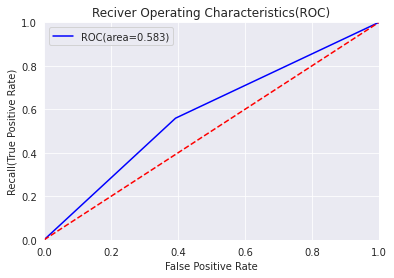

AUC: 0.5833267845448592


In [494]:
#ROC_AUC_Curve:-
plt.figure()
false_positive_rate,recall,thresholds=roc_curve(y_test_smote,y_pred_lr_test)
roc_auc=auc(false_positive_rate,recall)
plt.title('Reciver Operating Characteristics(ROC)')
plt.plot(false_positive_rate,recall,'b',label='ROC(area=%0.3f)' %roc_auc)
plt.legend()
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall(True Positive Rate)')
plt.xlabel('False Positive Rate')
plt.show()
print('AUC:',roc_auc)

In [495]:
cm=confusion_matrix(y_test_smote,y_pred_lr_test)
cm=pd.crosstab(y_test_smote,y_pred_lr_test)
cm

col_0,0,1
loan_status,,
0,23185,14990
1,16823,21352


In [496]:
classification_scores=classification_report(y_test_smote,y_pred_lr_test)
print(classification_scores)

              precision    recall  f1-score   support

           0       0.58      0.61      0.59     38175
           1       0.59      0.56      0.57     38175

    accuracy                           0.58     76350
   macro avg       0.58      0.58      0.58     76350
weighted avg       0.58      0.58      0.58     76350



In [504]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth=5,criterion='gini')
from sklearn.model_selection import GridSearchCV

In [505]:
param_grid={
    'max_depth' :range(5,6),
    'criterion':['gini','entropy'],
    'max_features':['auto','sqrt','log2']
}

In [506]:
#gs=GridSearchCV(rf,param_grid,cv=cv,n_jobs=-1)
rf.fit(X_train_smote,y_train_smote)

RandomForestClassifier(max_depth=5)

In [510]:
y_pred_train=rf.predict(X_train_smote)

In [511]:
y_pred_test=rf.predict(X_test_smote)

In [512]:
#ROC_AUC SCORE:-
roc_score=roc_auc_score(y_test_smote,y_pred_test)
print('ROC Score:',roc_score)

ROC Score: 0.7881990831696136


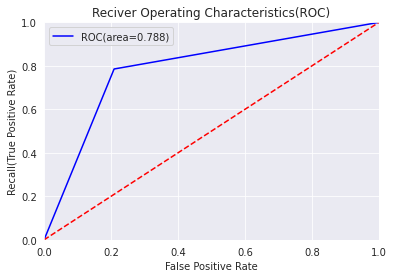

AUC: 0.7881990831696136


In [513]:
#ROC_AUC_Curve:-
plt.figure()
false_positive_rate,recall,thresholds=roc_curve(y_test_smote,y_pred_test)
roc_auc=auc(false_positive_rate,recall)
plt.title('Reciver Operating Characteristics(ROC)')
plt.plot(false_positive_rate,recall,'b',label='ROC(area=%0.3f)' %roc_auc)
plt.legend()
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall(True Positive Rate)')
plt.xlabel('False Positive Rate')
plt.show()
print('AUC:',roc_auc)

In [514]:
cm=confusion_matrix(y_test_smote,y_pred_test)
cm=pd.crosstab(y_test_smote,y_pred_test)
cm

col_0,0,1
loan_status,,
0,30192,7983
1,8188,29987


In [515]:
classification_scores=classification_report(y_test_smote,y_pred_test)
print(classification_scores)

              precision    recall  f1-score   support

           0       0.79      0.79      0.79     38175
           1       0.79      0.79      0.79     38175

    accuracy                           0.79     76350
   macro avg       0.79      0.79      0.79     76350
weighted avg       0.79      0.79      0.79     76350



In [516]:
s1=pd.Series(rf.feature_importances_)
s2=pd.Series(X_train.columns.to_list())

In [517]:
fi=pd.concat([s1,s2],axis=1)
fi

,0,1
0,0.005830,loan_amnt
1,0.169133,term
2,0.014765,int_rate
3,0.035734,grade
4,0.073762,emp_length
5,0.000272,annual_inc
6,0.017425,dti
7,0.019348,delinq_2yrs
8,0.124725,inq_last_6mths
9,0.002825,open_acc


With hyperparameter tuning using RandomSearchCv or GridSearchCv model performance can be improved further and SHAP values can be deduced for better interpretability of model